In [27]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [28]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [29]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [30]:
%matplotlib inline

In [31]:
%store -r X_relative_footsteps_continuous
%store -r Y_relative_footsteps_continuous
print(X_relative_footsteps_continuous.shape)
print(Y_relative_footsteps_continuous.shape)

(21421, 28)
(21421, 8)


# Multivariate Linear Regression (Foot prediction)

In [32]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
# Entries where FR is supporting
idxs = np.where(X_relative_footsteps_continuous[:, 22] == 0)[0]
X_relative_footsteps_continuous_FR_support = X_relative_footsteps_continuous[idxs]
Y_relative_footsteps_continuous_FR_support = Y_relative_footsteps_continuous[idxs]

## Predict FL foot -> x

In [34]:
X_relative_footsteps_continuous_FR_support[0, :]

array([ 0.1       ,  0.        ,  0.        ,  0.01715523,  0.02680482,
        0.05156133, -0.00914702,  0.0315145 , -0.02258525,  0.23698767,
        0.17026876, -0.40873471,  0.23344301, -0.16811552, -0.40935065,
       -0.24342878,  0.16518854, -0.41243429, -0.24083982, -0.16411242,
       -0.41243872,  1.        ,  0.        ,  0.        ,  1.        ,
        0.1       ,  0.        ,  0.        ])

In [35]:
Y_relative_footsteps_continuous_FR_support[0, :]

array([ 0.22567786,  0.17359778,  0.23985769, -0.16623835, -0.23764378,
        0.16585226, -0.25201704, -0.15896871])

### Linear Regression

In [52]:
# Input
X = np.hstack((X_relative_footsteps_continuous_FR_support[:, :3], # motion command
               X_relative_footsteps_continuous_FR_support[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_FR_support[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_FR_support[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_FR_support[:, 18:20])) # RR (x,y) position 

# Target
Y = np.array([Y_relative_footsteps_continuous_FR_support[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fr_relative_support_x = LinearRegression()

# Fit the model
model_fr_relative_support_x.fit(X_train, Y_train)

# Predict
predictions = model_fr_relative_support_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9963531418534086
RMSE:  0.0013048379540206107
The lowest error is:  3.030245555590838e-07
The highest error is:  0.015963712472382985
The avg. error is:  0.0007875859581316289


In [53]:
model_fr_relative_support_x.coef_

array([[ 1.00664647e-01,  7.55042267e-03,  3.58554797e-04,
         2.14067080e-01, -9.22727270e-02,  5.54949445e-01,
        -8.59476903e-02,  3.39691184e-02, -4.38944884e-02,
         6.59389492e-02, -1.53755800e-01]])

In [54]:
model_fr_relative_support_x.intercept_

array([0.05774747])

Text(0, 0.5, 'Predictions')

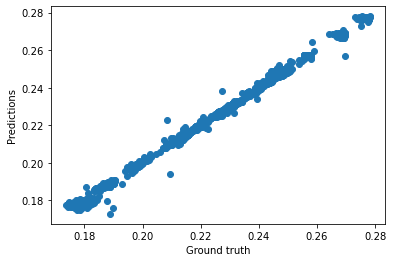

In [55]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [16]:
#%store model_fr_relative_support_x

In [17]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [18]:
# Save model
#joblib.dump(model_fr_relative_support_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fr_relative_support_x.sav")

### Predict FL foot -> y

In [85]:
# Input
X = np.hstack((X_relative_footsteps_continuous_FR_support[:, :3], # motion command
               X_relative_footsteps_continuous_FR_support[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_FR_support[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_FR_support[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_FR_support[:, 18:20])) # RR (x,y) position 

# Target
Y = np.array([Y_relative_footsteps_continuous_FR_support[:, 3]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fr_relative_support_y = LinearRegression()

# Fit the model
model_fr_relative_support_y.fit(X_train, Y_train)

# Predict
predictions = model_fr_relative_support_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9953613227191658
RMSE:  0.0014126193167878188
The lowest error is:  1.4670288944473864e-06
The highest error is:  0.015606476364556227
The avg. error is:  0.0009487749536263295


In [86]:
model_fr_relative_support_y.coef_

array([[-0.00802286,  0.11422631,  0.11751968,  0.01632509, -0.04267717,
        -0.05139392,  0.43730848,  0.05448194, -0.04376089,  0.0547442 ,
        -0.00615641]])

In [87]:
model_fr_relative_support_y.intercept_

array([-0.04498078])

Text(0, 0.5, 'Predictions')

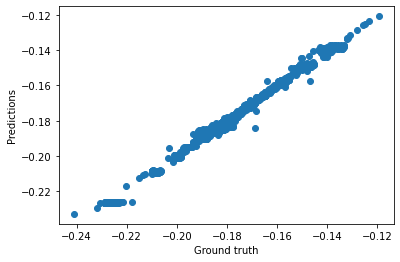

In [88]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [19]:
#%store model_fr_relative_support_y

In [20]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [22]:
# Save model
#joblib.dump(model_fr_relative_support_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fr_relative_support_y.sav")